In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('insulin_dosage_prediction.csv') .drop("patient_id", axis=1)
df

,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine,Insulin
0,male,68,yes,103.49,9.28,high,none,33.87,7.42,54.77,1.49,6.07,0.63,steady
1,female,57,yes,113.35,6.67,high,insulin,19.10,11.66,114.93,1.35,8.60,1.08,up
2,male,24,yes,127.40,4.14,medium,oral,22.48,5.72,59.07,0.96,5.19,1.36,up
3,male,49,yes,138.79,6.80,medium,oral,31.67,11.91,50.81,0.61,4.79,1.23,up
4,male,65,no,128.42,4.01,low,insulin,28.50,5.72,65.95,1.16,7.68,0.62,steady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,female,33,no,193.35,6.40,high,none,29.20,4.74,61.66,1.33,6.18,0.58,no
9996,male,77,yes,140.01,2.28,low,none,34.41,4.93,66.62,0.84,6.74,0.74,up
9997,female,71,yes,190.90,8.53,medium,oral,26.82,9.64,76.26,1.47,9.71,0.67,steady
9998,female,33,yes,164.27,7.50,high,none,29.82,9.34,94.50,1.04,8.49,0.96,no


In [4]:
print(f"Number of missing values:\n{df.isna().sum()}\nNumber of duplicated rows: {df.duplicated().sum()}")

Number of missing values:
gender                  0
age                     0
family_history          0
glucose_level           0
physical_activity       0
food_intake             0
previous_medications    0
BMI                     0
HbA1c                   0
weight                  0
insulin_sensitivity     0
sleep_hours             0
creatinine              0
Insulin                 0
dtype: int64
Number of duplicated rows: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                10000 non-null  object 
 1   age                   10000 non-null  int64  
 2   family_history        10000 non-null  object 
 3   glucose_level         10000 non-null  float64
 4   physical_activity     10000 non-null  float64
 5   food_intake           10000 non-null  object 
 6   previous_medications  10000 non-null  object 
 7   BMI                   10000 non-null  float64
 8   HbA1c                 10000 non-null  float64
 9   weight                10000 non-null  float64
 10  insulin_sensitivity   10000 non-null  float64
 11  sleep_hours           10000 non-null  float64
 12  creatinine            10000 non-null  float64
 13  Insulin               10000 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.1+ MB


In [6]:
# for col in df.columns: 
#     print(col)
#     print(np.sort(df[col].unique()))

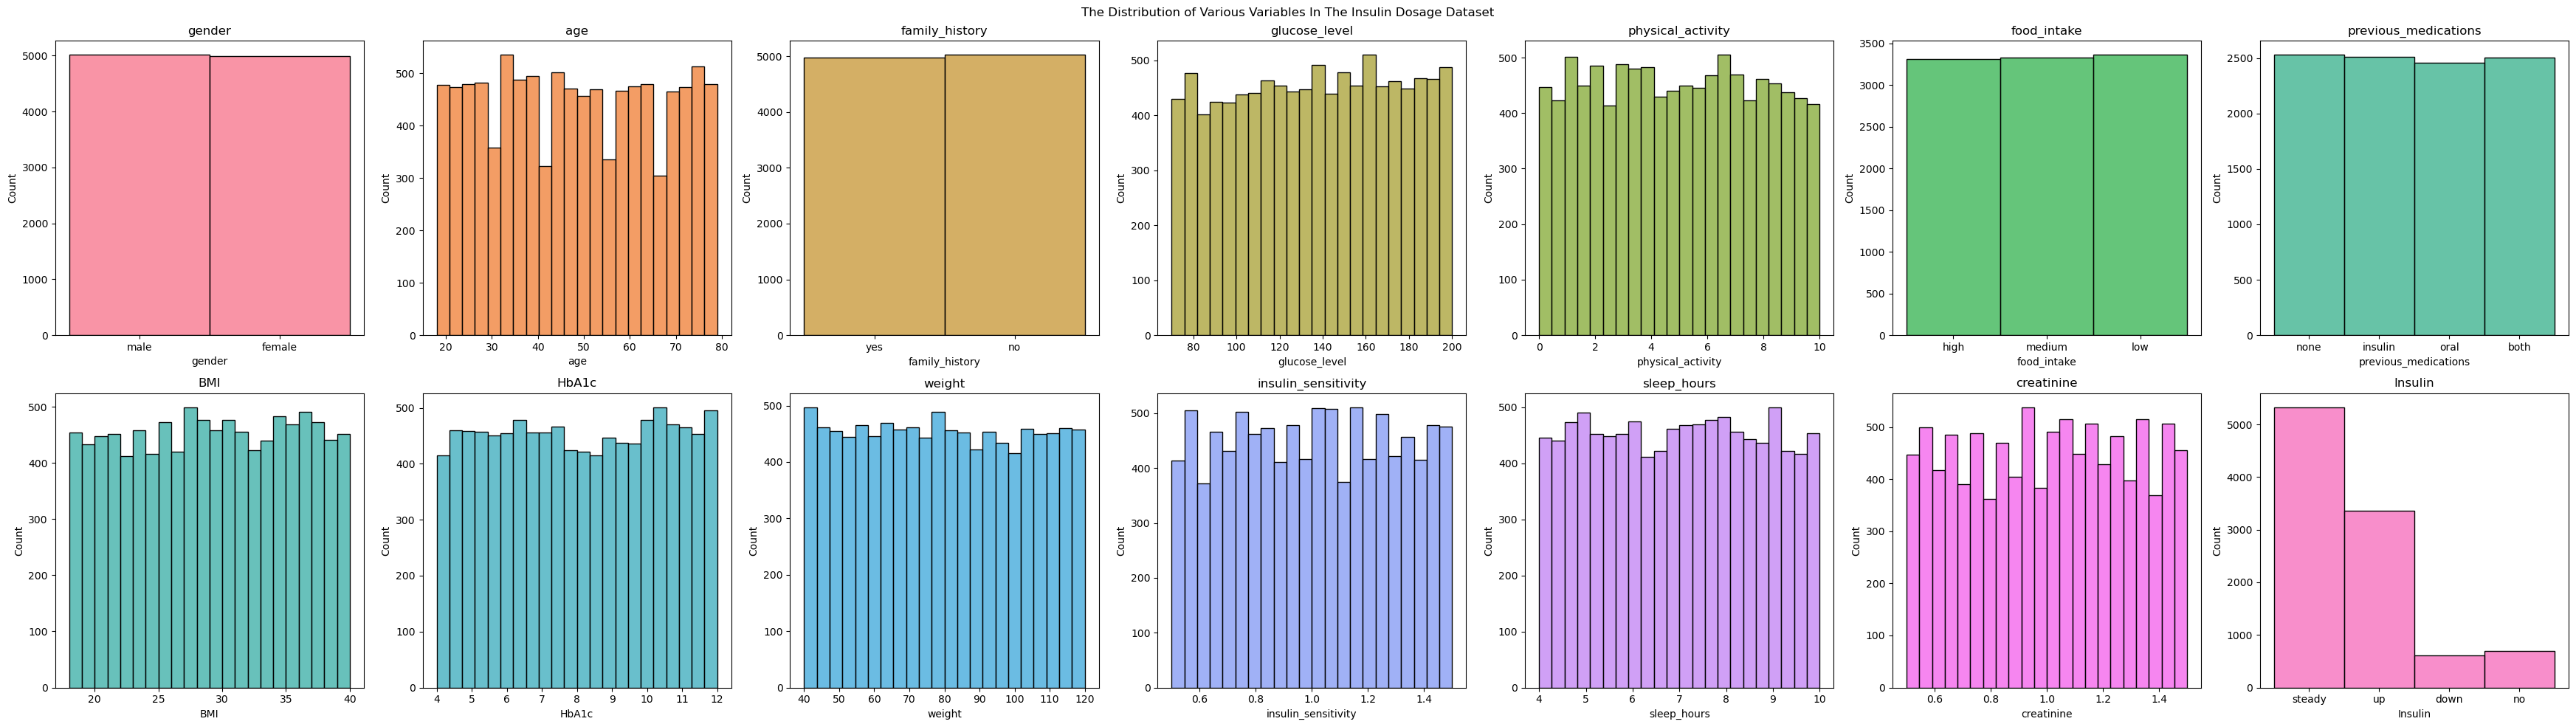

In [7]:
fig, ax = plt.subplots(2, 7, figsize=(35,10))

colours = sns.color_palette("husl", 14)

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//7, i%7], color=colours[i])
    ax[i//7, i%7].set_title(col)

plt.suptitle("The Distribution of Various Variables In The Insulin Dosage Dataset")
plt.tight_layout()
plt.show()

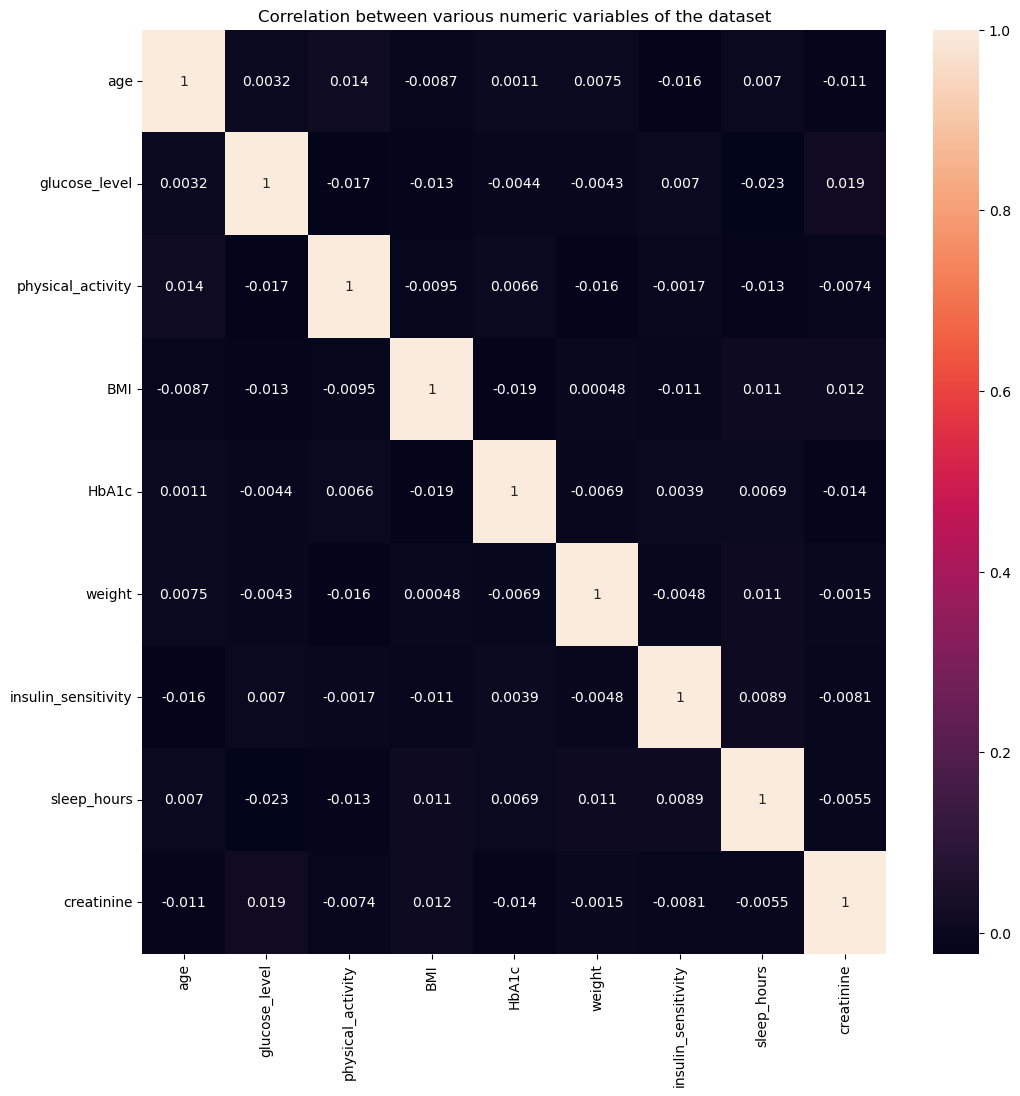

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.select_dtypes('number').corr(), annot=True)
plt.title("Correlation between various numeric variables of the dataset")
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
model = RandomForestClassifier(n_estimators=200)

num_cols = ['age', 'glucose_level', 'physical_activity', 'BMI', 'HbA1c', 'weight', 'insulin_sensitivity', 'sleep_hours', 'creatinine']
nominal_cols = ['gender', 'previous_medications']
ordinal_cols = ['family_history', 'food_intake']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('nom', OneHotEncoder(sparse_output=False), nominal_cols),
        ('ord', OrdinalEncoder(), ordinal_cols)
    ]
)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [1, 2, 3, 5, 7, 10]
}

In [14]:
x = df.drop('Insulin', axis=1)
y = df['Insulin']

x_transformed = preprocessor.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=12)

In [15]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
120 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 492, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\User\anaconda3\Lib\site-packages\sk

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...stimators=200)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_split': [1, 2, ...], 'n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold 

In [16]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

best_rf = grid_search.best_estimator_
test_acc = best_rf.score(x_test, y_test)
y_pred = best_rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9776666666666667

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        down       0.98      0.87      0.92       190
          no       0.98      0.99      0.99       189
      steady       0.97      1.00      0.98      1604
          up       0.99      0.96      0.98      1017

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



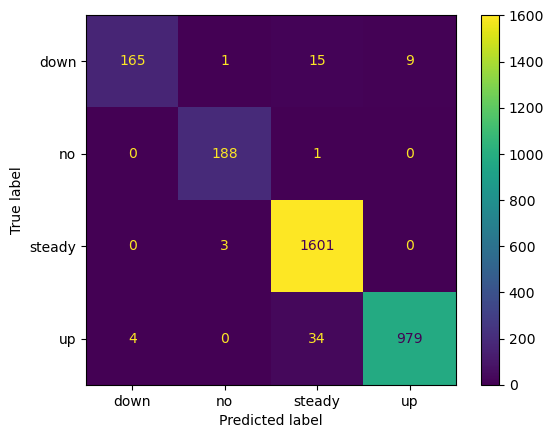

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [19]:
import joblib

joblib.dump(model, 'insulin_dosage_predictor.joblib')

['insulin_dosage_predictor.joblib']